In [1]:
import pytesseract
import cv2
import pyocr 
from PIL import Image
from PIL.ImageOps import invert
import matplotlib.pyplot as plt
import time
import numpy as np

In [74]:
# 分水岭
img = cv2. imread("ti.jpg", cv2.IMREAD_UNCHANGED)
blurred = cv2.pyrMeanShiftFiltering(img, 10, 100)
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2.imshow("binary", binary)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
mb = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations = 2)
sure_bg = cv2.dilate(mb, kernel, iterations = 3)
dist = cv2.distanceTransform(mb, cv2.DIST_L2, 3)
dist_output = cv2.normalize(dist, 0, 1.0, cv2.NORM_MINMAX)

ret, surface = cv2.threshold(dist, dist.max()*0.6, 255, cv2.THRESH_BINARY)
surface_fg = np.uint8(surface)
unkonwn = cv2.subtract(sure_bg, surface_fg)
ret, markers = cv2.connectedComponents(surface_fg)

markers = markers + 1
markers[unkonwn==255] = 0
markers = cv2.watershed(img, markers=markers)
img[markers==1] = [0,0,255]
cv2.imshow("resout_img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [9]:
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files (x86)/Tesseract-OCR/tesseract.exe'
image = Image.open(img, mode='r').convert("L")
image.save(f'F:/PYcode/Coding/ic/{time.localtime().tm_hour}{time.localtime().tm_min}.png', quality=50)
text = pytesseract.image_to_string(image, lang='chi_sim')
print(text.replace(' ',''))  

|,,

陆林

男“氏旗汉

1988年8月6日′"′_′

云南省宥哈市双龙街道深一标

山村委会:一
民身份号码5303811闹;

bE


In [96]:
# 利用正则匹配出年月日
import re
pattern = re.compile('^(\d{6})(\d{4})(\d{2})(\d{2})(\d{3})([0-9]|X)$')
str = u'51201219850223455X'
resout = pattern.search(str)
# resout = re.match(r'^\d{6}(\d{4})(\d{2})(\d{2})\d{3}', str)
print(resout.group(1))
print(resout.group(2))
print(resout.group(3))
print(resout.group(4))
print(resout.group(5))
print(resout.group(6))

512012
1985
02
23
455
X


In [44]:
# img_dict = {"name": [[109, 40],[217, 89]],
#            "gender": [[109, 89], [160, 143]],
#            "nation": [[236, 89], [280, 143]], 
#            "year": [[109, 143], [179, 192]],
#            "month": [[203, 143], [233, 192]],
#            "day": [[260, 143], [295, 192]],
#            "address": [[109, 192], [376, 268]],
#            "IDnumber": [[199, 310], [547, 376]],
#            "img": [[376, 58], [559, 297]]}

In [62]:
img_dict = {"name": [[109, 40],[370, 88]],
           "gender": [[109, 88], [370, 135]],
           "year": [[109, 135], [370, 188]],
           "address": [[109, 188], [370, 270]],
           "IDnumber": [[199, 310], [547, 376]]}

In [63]:
# for name, img_data in img_dict.items():
#     print(name)
#     name = image[img_data[0][0]:img_data[1][0], img_data[0][1]: img_data[1][1]]
#     cv2.imshow(f"{name}",name)

image = cv2.imread("result_done49.jpg", cv2.IMREAD_GRAYSCALE)
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], np.float32) #锐化
image = cv2.filter2D(image, -1, kernel=kernel)

ret, mask = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)
new_img_dict = {}
for i in img_dict:
    new_img_dict[i] = image[img_dict[i][0][1]:img_dict[i][1][1], img_dict[i][0][0]: img_dict[i][1][0]]

In [57]:
cv2.imshow("mask", mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [64]:
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files (x86)/Tesseract-OCR/tesseract.exe'
for i_img in new_img_dict:
#     print(i_img)
#     if new_img_dict[i_img].shape[1] < 50:
#         new_img_dict[i_img] = cv2.resize(new_img_dict[i_img], (0, 0), fx=5, fy=5, interpolation=cv2.INTER_NEAREST)
#         print("****")
#         text4 = pytesseract.image_to_string(new_img_dict[i_img], lang='chi_sim')
#         print(text4.replace(' ',''))    
#         print("****")

#     else:
    if i_img == "nation":
        text1 = pytesseract.image_to_string(new_img_dict[i_img], lang='nation')
        print(f"nation:::{text1.replace(' ','')}") 
    elif i_img == "IDnumber":
        text2 = pytesseract.image_to_string(new_img_dict[i_img], lang='idnum')
        print(text2.replace(' ',''))   
    elif i_img == "year":
        text2 = pytesseract.image_to_string(new_img_dict[i_img], lang='idnum')
#         print(text2.replace(' ',''))   
#     elif i_img == "month":
#         text2 = pytesseract.image_to_string(new_img_dict[i_img], lang='idnum')
#         print(text2.replace(' ',''))  
#     elif i_img == "day":
        text2 = pytesseract.image_to_string(new_img_dict[i_img], lang='idnum')
        print(text2.replace(' ',''))  
    elif i_img == "gender":
        text3 = pytesseract.image_to_string(new_img_dict[i_img], lang='sex')
        print(text3.replace(' ',''))  

    text = pytesseract.image_to_string(new_img_dict[i_img], lang='chi_sim')
    cv2.imwrite(f"{i_img}.jpg", new_img_dict[i_img])
    print(f"{i_img}:{text.replace(' ','')}")

name:一季日月′】3′
男男男
gender:民「旌泽
198725518135
year:怡颞翼J月1昆
address:
44052419827016110614L
IDnumber:44052419870.
:′′沥


In [25]:
import cv2

# 读取一张照片
img = cv2.imread('month.jpg')

# 缩放成200x200的图像
img_200x200 = cv2.resize(img, (60, 80))

# 不直接指定缩放后大小，通过fx和fy指定缩放比例，0.5则长宽都为原来一半
# 等效于img_200x300 = cv2.resize(img, (300, 200))，注意指定大小的格式是(宽度,高度)
# 插值方法默认是cv2.INTER_LINEAR，这里指定为最近邻插值
img_200x300 = cv2.resize(img, (0, 0), fx=5, fy=5, interpolation=cv2.INTER_NEAREST)

cv2.imshow('resized_200x200.jpg', img_200x200)
cv2.imshow('resized_200x300.jpg', img_200x300)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
image = cv2.imread("name1.jpg", cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 85, 1)
# image = cv2.pyrMeanShiftFiltering(image, 2, 4, maxLevel=1)

ret, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2.imshow("binary", image)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,2))
bin1 = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,1))
bin2 = cv2.morphologyEx(bin1, cv2.MORPH_OPEN, kernel)
# cv2.bitwise_not(bin2, bin2)
textimg = Image.fromarray(bin2)

pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files (x86)/Tesseract-OCR/tesseract.exe'


text2 = pytesseract.image_to_string(binary, lang='chi_sim')
text3 = pytesseract.image_to_string(bin1, lang='chi_sim')
text1 = pytesseract.image_to_string(textimg, lang='chi_sim')
text4 = pytesseract.image_to_string(bin2, lang='chi_sim')

# print(f"img:{text.replace(' ','')}")

print(text2)
print(text3)
print(text4)
print(text1)


cv2.imshow("jj", image)
cv2.imshow("bin1", bin1)
# cv2.imshow("textimg", textimg)

cv2.waitKey(0)
cv2.destroyAllWindows()

一季 日月′】 。
标 深 气
李 : 朋 口
李 : 朋 口


In [105]:
image = cv2.imread("name.jpg", cv2.IMREAD_COLOR)
image.shape

(48, 261, 3)

In [65]:
## 识别身份证号
image = cv2.imread("IDnumber1.jpg", cv2.IMREAD_COLOR)
image1 = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)
image2 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
# image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 85, 1)
# image = cv2.pyrMeanShiftFiltering(image, 2, 4, maxLevel=1)
ret, binary = cv2.threshold(image2, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# ret, binary = cv2.threshold(image2, 50, 255, cv2.THRESH_BINARY)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,2))
bin1 = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,1))
bin2 = cv2.morphologyEx(bin1, cv2.MORPH_OPEN, kernel)
# cv2.bitwise_not(bin2, bin2)
textimg = Image.fromarray(bin2)
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files (x86)/Tesseract-OCR/tesseract.exe'

text1 = pytesseract.image_to_string(image1, lang='idnum')
text2 = pytesseract.image_to_string(image2, lang='idnum')
text3 = pytesseract.image_to_string(binary, lang='idnum')
text4 = pytesseract.image_to_string(bin1, lang='idnum')
text5 = pytesseract.image_to_string(bin2, lang='idnum')
text6 = pytesseract.image_to_string(textimg, lang='idnum')

# print(f"img:{text.replace(' ','')}")

print(text1)
print(text2)
print(text3)
print(text4)
print(text5)
print(text6)

cv2.imshow("image1", image1)
cv2.imshow("image2", image2)
cv2.imshow("binary", binary)
cv2.imshow("bin1", bin1)
cv2.imshow("bin2", bin2)    

cv2.waitKey(0)
cv2.destroyAllWindows()

440524198777016170014
440524198777016170014
440524198777016170014
44052419877701010014
44052419877701010014
44052419877701010014


In [66]:
import re
text_list = (text1,text2,text3,text4,text5,text6)
def get_year(text_list):
    year = ''
    month = ''
    day = ''    
    for text in text_list:
        if len(text) == 18:
            str_match = re.compile("^(\d{6})(\d{4})(\d{2})(\d{2})(\d{3})([0-9]|X)$")
            resout = re.match(str_match, text)
            year = resout.group(2)
            if int(resout.group(3)) < 13:
                month = resout.group(3)
            if int(resout.group(4)) < 31:
                day = resout.group(4)
            return year, month, day
    
        else:
            return "身份证号识别不正确"
get_year(text_list)

'身份证号识别不正确'

In [7]:
ss = '44052419877701010014'
len(ss)

20

In [44]:
## 识别身份证号
image = cv2.imread("gender.jpg", cv2.IMREAD_COLOR)
image1 = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)
image2 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
# image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 85, 1)
# image = cv2.pyrMeanShiftFiltering(image, 2, 4, maxLevel=1)
ret, binary = cv2.threshold(image2, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# ret, binary = cv2.threshold(image2, 50, 255, cv2.THRESH_BINARY)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,2))
bin1 = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,1))
bin2 = cv2.morphologyEx(bin1, cv2.MORPH_OPEN, kernel)
# cv2.bitwise_not(bin2, bin2)
textimg = Image.fromarray(bin2)
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files (x86)/Tesseract-OCR/tesseract.exe'

text1 = pytesseract.image_to_string(image1, lang='chi_sim')
text2 = pytesseract.image_to_string(image2, lang='chi_sim')
text3 = pytesseract.image_to_string(binary, lang='chi_sim')
text4 = pytesseract.image_to_string(bin1, lang='chi_sim')
text5 = pytesseract.image_to_string(bin2, lang='chi_sim')
text6 = pytesseract.image_to_string(textimg, lang='chi_sim')

# print(f"img:{text.replace(' ','')}")

print(f'image1:{text1}')
print(f'image2:{text2}')
print(f'binary:{text3}')
print(f'bin1, :{text4}')
print(f'bin2, :{text5}')
print(f'textim:{text6}')

cv2.imshow("image1", image1)
cv2.imshow("image2", image2)
cv2.imshow("binary", binary)
cv2.imshow("bin1", bin1)
cv2.imshow("bin2", bin2)    

cv2.waitKey(0)
cv2.destroyAllWindows()

image1:民 烽 泽
image2:民 烽 泽
binary:民 族 沉
bin1, :民 旅 泽
bin2, :民 旁 汊
textim:民 旁 汊


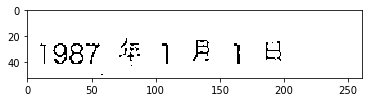

In [30]:
plt.imshow(textimg)
plt.show()